## PREDICCIÓN DE VENTAS DE NUEVOS LOCALES DE COMIDA RÁPIDA



## Presentación de la empresa

FG Burgers es una multinacional con origen en USA de comida rápida con más de 3000 locales distribuidos por todo el mundo, uno de los países en los que tiene operación es España donde tiene 22 locales en operación en 5 Comunidades Autónomas distintas.

De cara a mejorar sus operaciones y todo su sistema de pedidos y horarios está buscando una solución para la proyección de ventas de sus locales.

## Objetivos de la investigación

El objetivo de la investigación es realizar un modelo de proyección de ventas para poder predecir las ventas a futuro de los locales de la marca y también entender el comportamiento de estos en función de sus distintas variables.

Dentro de los objetivos de la investigación está resolver las siguientes preguntas



*   ¿Qué tipo de formato tiene mayor facturación?
*   ¿Qué Comunidad Autónoma es la que genera mayor facturación?
*   ¿Afecta la época del año a las ventas?¿Hay patrones de estacionalidad?
*   ¿Hay relación entre la venta y el periodo del mes?
*   ¿Afecta a las ventas que el día sea laborable o que haya algún festivo?


En base a estas preguntas se podrá definir un modelo de predicción de ventas que ayude a la marca a ajustar sus proyecciones de la manera más exacta para adaptar mejor la operación a la demanda de los locales.

## Equipo de trabajo

*Antonio Elvira García*

Tengo 35 años soy español y actualmente resido entre España y Argentina y me desempeño con gerente de expansión de la marca MTZ, teniendo la responsabilidad la apertura de nuevos locales de la marca en distintos paises.
Mi formación principal fue administración y operacional pero actualmente he incursionado en el mundo del análisis de datos lo que me lleva a cursar la carrera de Data Scientist en CoderHouse conocimientos que pretendo aplicar a mis responsabilidades actuales.

## Fuente del Dataset y criterios de selección

El dataset fue conformada con datos provenientes de distintas fuentes de información de la empresa como son el programa de facturación de ventas de los locales y la base de datos de los locales.

Se decidió tomar este Dataset porque contiene distinta información relevante de los locales actualmente abiertos por la marca para ser usada a la hora de realizar proyecciones de ventas.

## Explicación de los datos en el Dataset

#VENTAS
1.  **Local**: Es el Id de cada local
2.  **Nombre_Local**: Es el nombre interno de cada local
3.  **Fecha**: La fecha en la que se realizó la venta
4.  **Dia_Semana**: Número de día de la semana relacionado con la fecha;


*   1 = Lunes
*   2 = Martes
*   3 = Miércoles
*   4 = Jueves
*   5 = Viernes
*   6 = Sábado
*   7 = Domingo


5.  **Ventas**: Ventas netas expresadas en euros realizadas por el local en ese día.
6.  **Clientes**: Cantidad de clientes atendidos en el local en ese día.
7.  **Laborable**: Indica si la fecha fue laborable;


*   1 = Laborable
*   0 = No laborable

Se consideran como no laborables a criterio de la marca los días festivos y los Sábados y Domingos.


8.  **Festivo**: Indica si la fecha fue festivo.


*   1 = Festivo
*   0 = No Festivo

Los festivos tomados son los festivos nacionales de España



#STORE

1. **Local**: Es el Id de cada local
2. **Nombre_Local**: Es el nombre interno de cada local
3. **Tipo_Local**: Es el tipo de local, puede ser de dos tipos;



*   In Store: Local ubicado a pie de calle
*   Mall: Local ubicado dentro de un Centro Comercial


4. **Comunidad**: Indica a que Comunidad Autónoma (región) pertenece cada local;



*   1 = Comunidad de Madrid
*   2 = Cataluña
*   3 = Andalucia
*   4 = Pais Vasco
*   5 = Comunidad Valenciana



##Instalamos Prophet

In [1]:
!pip install fbprophet

## Importamos las librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Cargamos el dataset y los leemos

In [3]:
url_ventas='/content/drive/MyDrive/Data Scientist/Trabajo final/ventas.csv'
df_ventas = pd.read_csv(url_ventas, sep=';',encoding='latin-1')

In [4]:
url_store='/content/drive/MyDrive/Data Scientist/Trabajo final/store1.csv'
df_store = pd.read_csv(url_store, sep=';',encoding='latin-1')

## Visualizamos el dataset de ventas

In [5]:
df_ventas

,Local,Nombre_Local,Fecha,Dia_Semana,Ventas,Clientes,Laborable,Festivo
0,1,Gran Via,31/03/2022,4,8290,576,1,0
1,2,Parquesur,31/03/2022,4,6900,442,1,0
2,3,Plaza Rio,31/03/2022,4,5991,412,1,0
3,4,La Gavia,31/03/2022,4,7608,501,1,0
4,5,La Maquinista,31/03/2022,4,6547,464,1,0
...,...,...,...,...,...,...,...,...
17505,18,Diagonal,01/01/2020,3,10831,605,0,1
17506,19,Valencia,01/01/2020,3,10110,562,0,1
17507,20,Paseo de Gracia,01/01/2020,3,14452,815,0,1
17508,21,Xanadu,01/01/2020,3,12240,701,0,1


## Size del dataset

In [6]:
df_ventas.shape

(17510, 8)

## Tipos de datos del dataset de ventas

In [7]:
df_ventas.dtypes

Local            int64
Nombre_Local    object
Fecha           object
Dia_Semana       int64
Ventas           int64
Clientes         int64
Laborable        int64
Festivo          int64
dtype: object

## Convertimos la columna fecha al tipo de dato datetime

In [37]:
df_ventas['Fecha'] = pd.to_datetime(df_ventas['Fecha'], format='%d/%m/%Y')
df_ventas

,Local,Nombre_Local,Fecha,Dia_Semana,Ventas,Clientes,Laborable,Festivo
0,1,Gran Via,2022-03-31,4,8290,576,1,0
1,2,Parquesur,2022-03-31,4,6900,442,1,0
2,3,Plaza Rio,2022-03-31,4,5991,412,1,0
3,4,La Gavia,2022-03-31,4,7608,501,1,0
4,5,La Maquinista,2022-03-31,4,6547,464,1,0
...,...,...,...,...,...,...,...,...
17505,18,Diagonal,2020-01-01,3,10831,605,0,1
17506,19,Valencia,2020-01-01,3,10110,562,0,1
17507,20,Paseo de Gracia,2020-01-01,3,14452,815,0,1
17508,21,Xanadu,2020-01-01,3,12240,701,0,1


## Revisamos que se haya realizado de forma correcta

In [9]:
df_ventas.dtypes

Local                    int64
Nombre_Local            object
Fecha           datetime64[ns]
Dia_Semana               int64
Ventas                   int64
Clientes                 int64
Laborable                int64
Festivo                  int64
dtype: object

##Más info del dataset de ventas

In [10]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17510 entries, 0 to 17509
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Local         17510 non-null  int64         
 1   Nombre_Local  17510 non-null  object        
 2   Fecha         17510 non-null  datetime64[ns]
 3   Dia_Semana    17510 non-null  int64         
 4   Ventas        17510 non-null  int64         
 5   Clientes      17510 non-null  int64         
 6   Laborable     17510 non-null  int64         
 7   Festivo       17510 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.1+ MB


##Revisamos si existen nulos

In [11]:
df_ventas.isnull().sum()

Local           0
Nombre_Local    0
Fecha           0
Dia_Semana      0
Ventas          0
Clientes        0
Laborable       0
Festivo         0
dtype: int64

## Principales estadísticos

In [12]:
round(df_ventas.describe())

,Local,Dia_Semana,Ventas,Clientes,Laborable,Festivo
count,17510.0,17510.0,17510.0,17510.0,17510.0,17510.0
mean,11.0,4.0,7978.0,503.0,1.0,0.0
std,6.0,2.0,1481.0,74.0,0.0,0.0
min,1.0,1.0,5200.0,329.0,0.0,0.0
25%,6.0,2.0,6892.0,448.0,0.0,0.0
50%,11.0,4.0,7774.0,497.0,1.0,0.0
75%,17.0,6.0,8800.0,551.0,1.0,0.0
max,22.0,7.0,15550.0,900.0,1.0,1.0


#Insight


*   La media de ventas es **8777**
*   La menor venta fue **1423**
*   La mayor venta fue **30810**
*   La media de clientes **fue** 835
*   El menor registro de clientes fue **182**
*   El mayor registro de clientes fue **3419** 



## Visualizamos el dataset store

In [13]:
df_store

,Local,Nombre_Local,Tipo_Local,Comunidad
0,1,Gran Via,In Store,1
1,2,Parquesur,Mall,1
2,3,Plaza Rio,Mall,1
3,4,La Gavia,Mall,1
4,5,La Maquinista,Mall,2
5,6,Granada,Mall,3
6,7,Plaza Mayor,In Store,1
7,8,Castellana,In Store,1
8,9,Sagrada Familia,In Store,2
9,10,Serrano,In Store,1


## Size del dataset

In [ ]:
df_store.shape

(22, 4)

## Tipos de datos del dataset store

In [ ]:
df_store.dtypes

Local            int64
Nombre_Local    object
Tipo_Local      object
Comunidad        int64
dtype: object

##Más info del dataset store

In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Local         22 non-null     int64 
 1   Nombre_Local  22 non-null     object
 2   Tipo_Local    22 non-null     object
 3   Comunidad     22 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 832.0+ bytes


##Revisamos si existen nulos

In [ ]:
df_store.isnull().sum()

Local           0
Nombre_Local    0
Tipo_Local      0
Comunidad       0
dtype: int64

## EDA VARIABLES CUALITATIVAS DE LOS LOCALES

# Tipo de Local

Contamos cuantos locales tenemos por tipo y vemos la distribución de frecuencia

In [30]:
df_store["Tipo_Local"].value_counts()

In Store    12
Mall        10
Name: Tipo_Local, dtype: int64

In [ ]:
#Contamos los valores de la columna Tipologia del df
frec = df_store["Tipo_Local"].value_counts()
#Guardamos esta información en un dataframe
frec_df = pd.DataFrame(frec)
#Asignamos el nombre Frec_abs a la columna
frec_df.rename(columns={'Tipo_Local':'Frec_abs'},inplace=True)
#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = 100 * frec_df["Frec_abs"]/len(df_store.Tipo_Local)
frec_df

,Frec_abs,frec_rel_%
In Store,12,54.545455
Mall,10,45.454545


Realizamos un gráfico de barras para visualizar mejor los tipos de locales

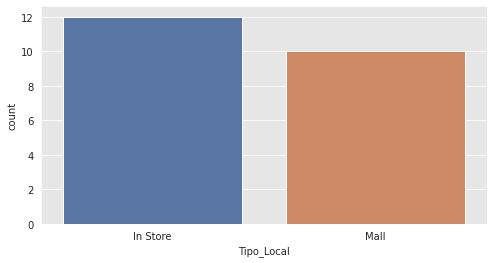

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(df_store['Tipo_Local'])

# Comunidad

Contamos cuantos locales tenemos por tipo y vemos la distribución de frecuencia

In [18]:
df_store["Comunidad"].value_counts()

1    9
2    6
3    4
5    2
4    1
Name: Comunidad, dtype: int64

In [ ]:
#Contamos los valores de la columna Comunidad del df
frec_com = df_store["Comunidad"].value_counts()
#Guardamos esta información en un dataframe
frec_df_com = pd.DataFrame(frec_com)
#Asignamos el nombre Frec_abs a la columna
frec_df_com.rename(columns={'Comunidad':'Frec_abs'},inplace=True)
#Calculamos la Frecuencia Relativa en %
frec_df_com["frec_rel_%"] = 100 * frec_df_com["Frec_abs"]/len(df_store.Comunidad)
frec_df_com

,Frec_abs,frec_rel_%
1,9,40.909091
2,6,27.272727
3,4,18.181818
5,2,9.090909
4,1,4.545455


Realizamos un boxplot con la distribución de datos de Comunidad

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


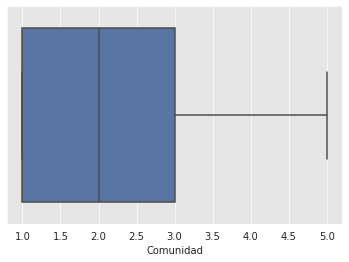

In [ ]:
from seaborn import boxplot
boxplot(df_store.Comunidad)

Realizamos un gráfico de barras para visulaizar el % de locales por comunidad

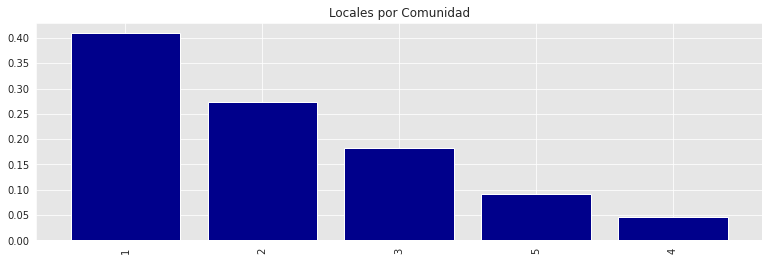

In [ ]:
plt.figure(figsize=(13, 4))
(df_store['Comunidad'].value_counts() / len(df_store)).plot.bar(color = 'Darkblue', width = 0.8, title = 'Locales por Comunidad')

## Unimos nuestros dos dataset, Store y Ventas

In [19]:
df = pd.merge(df_ventas, df_store, on= ['Local','Nombre_Local'])
df

,Local,Nombre_Local,Fecha,Dia_Semana,Ventas,Clientes,Laborable,Festivo,Tipo_Local,Comunidad
0,1,Gran Via,2022-03-31,4,8290,576,1,0,In Store,1
1,1,Gran Via,2022-03-30,3,6958,469,1,0,In Store,1
2,1,Gran Via,2022-03-29,2,8099,563,1,0,In Store,1
3,1,Gran Via,2022-03-28,1,8542,592,1,0,In Store,1
4,1,Gran Via,2022-03-27,7,8917,519,0,0,In Store,1
...,...,...,...,...,...,...,...,...,...,...
17505,22,La Vaguada,2020-01-05,7,8887,510,0,0,Mall,1
17506,22,La Vaguada,2020-01-04,6,11305,658,0,0,Mall,1
17507,22,La Vaguada,2020-01-03,5,7924,523,1,0,Mall,1
17508,22,La Vaguada,2020-01-02,4,9285,625,1,0,Mall,1


Extraemos eñ año, el mes y el día a nuevas columnas separadas para poder realizar un mejor análisis del dataset

In [20]:
df['Año']=df.Fecha.apply(lambda x: x.year)
df['Mes']=df.Fecha.apply(lambda x: x.month)
df['Dia']=df.Fecha.apply(lambda x: x.day)
df

,Local,Nombre_Local,Fecha,Dia_Semana,Ventas,Clientes,Laborable,Festivo,Tipo_Local,Comunidad,Año,Mes,Dia
0,1,Gran Via,2022-03-31,4,8290,576,1,0,In Store,1,2022,3,31
1,1,Gran Via,2022-03-30,3,6958,469,1,0,In Store,1,2022,3,30
2,1,Gran Via,2022-03-29,2,8099,563,1,0,In Store,1,2022,3,29
3,1,Gran Via,2022-03-28,1,8542,592,1,0,In Store,1,2022,3,28
4,1,Gran Via,2022-03-27,7,8917,519,0,0,In Store,1,2022,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17505,22,La Vaguada,2020-01-05,7,8887,510,0,0,Mall,1,2020,1,5
17506,22,La Vaguada,2020-01-04,6,11305,658,0,0,Mall,1,2020,1,4
17507,22,La Vaguada,2020-01-03,5,7924,523,1,0,Mall,1,2020,1,3
17508,22,La Vaguada,2020-01-02,4,9285,625,1,0,Mall,1,2020,1,2


## EDA DEL NUEVO DATASET

Vemos el tamaño de nuestro dataset

In [ ]:
df.shape

(17510, 13)

Vemos tipos de datos del dataset

In [ ]:
df.dtypes

Local                    int64
Nombre_Local            object
Fecha           datetime64[ns]
Dia_Semana               int64
Ventas                   int64
Clientes                 int64
Laborable                int64
Festivo                  int64
Tipo_Local              object
Comunidad                int64
Año                      int64
Mes                      int64
Dia                      int64
dtype: object

Gráfico con las correlaciones

Text(0.5, 1.0, 'Correlaciones del Dataset')

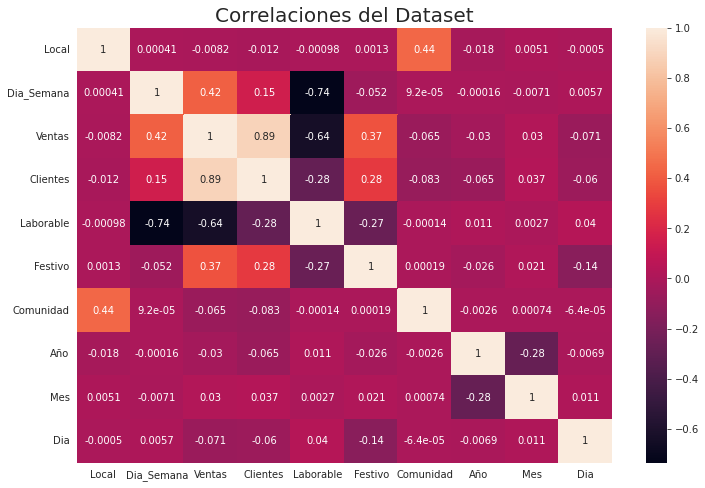

In [21]:
plt.figure(figsize=(12, 8))
df_corr = df.corr()
sns.heatmap(df_corr, 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values,
            annot = True);
plt.title('Correlaciones del Dataset', fontsize = 20)

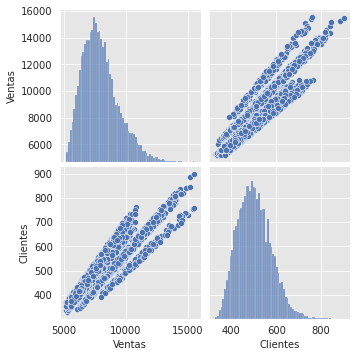

In [22]:
sns.pairplot(df[['Ventas','Clientes']])

Correlaciones de las ventas

In [23]:
correlations_ventas = df.corr()['Ventas'].sort_values()
correlations_ventas

Laborable    -0.640304
Dia          -0.070786
Comunidad    -0.065388
Año          -0.029911
Local        -0.008207
Mes           0.029551
Festivo       0.372778
Dia_Semana    0.422963
Clientes      0.885386
Ventas        1.000000
Name: Ventas, dtype: float64

Insight


*   Las ventas están estrechamente relacionadas con el número de clientes
*   También existe una relación fuerte entre las ventas y el día de la semana
*   Existe gran relación entre el nivel de ventas y si el día es laborable o no



Correlaciones de los clientes

In [24]:
correlations_clientes = df.corr()['Clientes'].sort_values()
correlations_clientes

Laborable    -0.283569
Comunidad    -0.082812
Año          -0.065036
Dia          -0.059778
Local        -0.012389
Mes           0.036533
Dia_Semana    0.153300
Festivo       0.284855
Ventas        0.885386
Clientes      1.000000
Name: Clientes, dtype: float64

Insight


*   Los clientes están estrechamente relacionadas con las ventas
*   También existe una relación fuerte entre las ventas y el día de la semana
*   Hay una gran relación entre si el día es laborable y la cantidad de clientes

#Análisis de Ventas por Tipo de Local

Agrupamos y filtramos los datos

In [50]:
venta_tipologia = round((df.groupby(['Tipo_Local']).mean()[['Ventas', 'Clientes']]*100),1)
venta_tipologia                        

,Ventas,Clientes
Tipo_Local,,
In Store,839752.3,52928.0
Mall,748218.5,47139.1


Realizamos un gráfico con la agrupación anterior

Text(0.5, 1.0, 'Venta por Tipo de local')

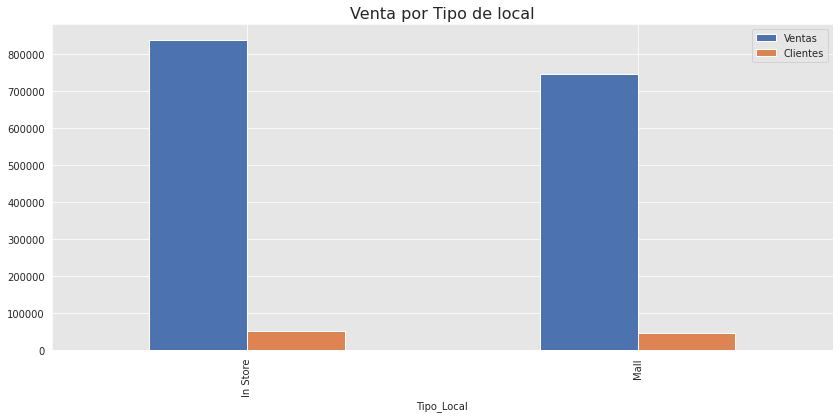

In [47]:
plt.rcParams['figure.figsize'] = (14, 6)
venta_tipologia.plot.bar(stacked=False)
plt.title('Venta por Tipo de local', fontsize = 16)

Insight


*   Podemos que si bién no es determinante si hay una relación entre los locales y el tipo al que pertenecen
*   Podemos observar que los locales tipo Instore tienen una facturación mayor que los locales tipo Mall
*   Al igual que con las ventas pasa lo mismo con los datos de clientes

#Análisis de Ventas por Comunidad Autónoma

Agrupamos y filtramos los datos

In [49]:
venta_comunidad = round((df.groupby(['Comunidad']).mean()[['Ventas', 'Clientes']]*100),1)
venta_comunidad      

,Ventas,Clientes
Comunidad,,
1,815192.0,51368.2
2,801462.0,50512.9
3,744566.6,46946.6
4,811352.7,51016.0
5,812078.4,51156.2


Realizamos un gráfico con la agrupación anterior

Text(0.5, 1.0, 'Venta por Comunidad')

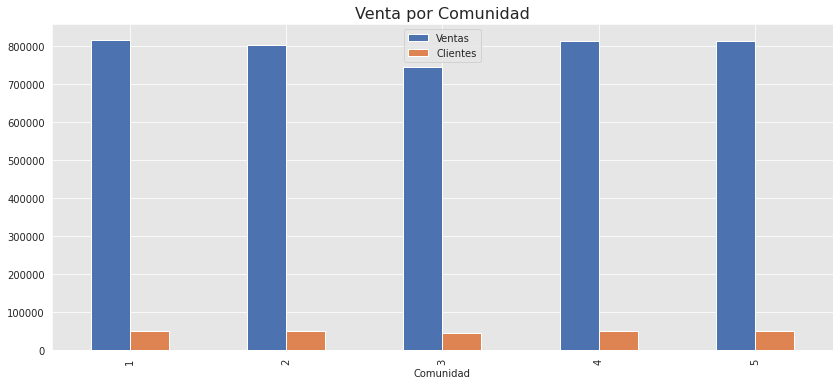

In [54]:
plt.rcParams['figure.figsize'] = (14, 6)
venta_comunidad.plot.bar(stacked=False)
plt.title('Venta por Comunidad', fontsize = 16)

Insight


*   Podemos ver que no hay una realción significativa entre la Comunidad y las ventas generales

#Realizamos un gráfico agrupando las ventas y los clientes por mes

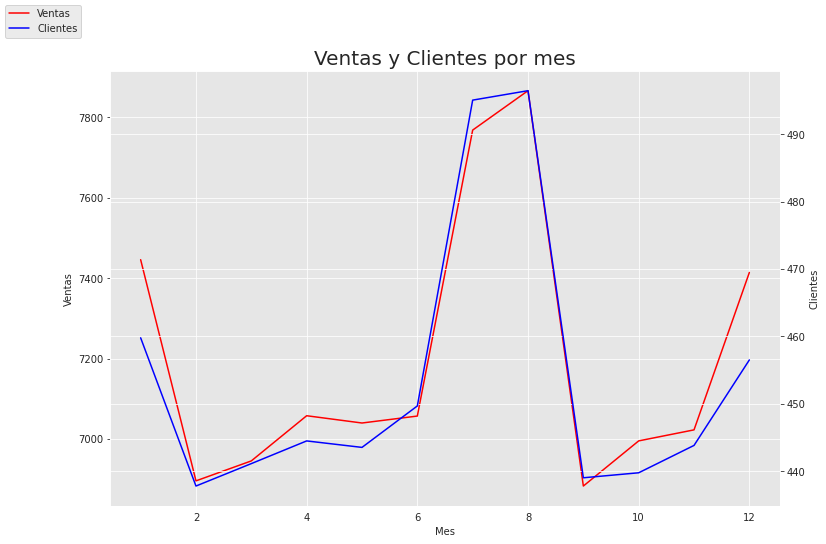

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=df.groupby('Mes')[['Ventas','Clientes']].mean(), x='Mes', y='Ventas', color='r', label='Ventas', legend=False)
ax2 = plt.twinx()
sns.lineplot(data=df.groupby('Mes')[['Ventas','Clientes']].mean(), x='Mes', y='Clientes', ax=ax2, color='b', label='Clientes', legend=False)
ax.figure.legend(loc='upper left')
plt.title('Ventas y Clientes por mes', fontsize = 20)
plt.show()

Insight


*   Podemos observar que hay un incremento de clientes y ventas durante los periodos de junio a septiembre y noviembre a enero
*   Estos periodos coinciden con el verano y las Navidades, periodos en los que los consumidores tienen más vacaciones



# Analizamos las ventas y los clientes por día del mes

Agrupamos por dia del mes y hacemos la media de clientes y ventas

In [ ]:
df.groupby('Dia')[['Ventas','Clientes']].mean()

,Ventas,Clientes
Dia,,
1,7929.399306,488.435764
2,7456.960069,466.593750
3,7152.498264,456.638889
4,7335.364583,461.989583
5,7432.001736,462.994792
6,7844.645833,477.467014
7,7249.835069,457.114583
8,7367.906250,459.795139
9,7153.449653,450.496528


Graficamos

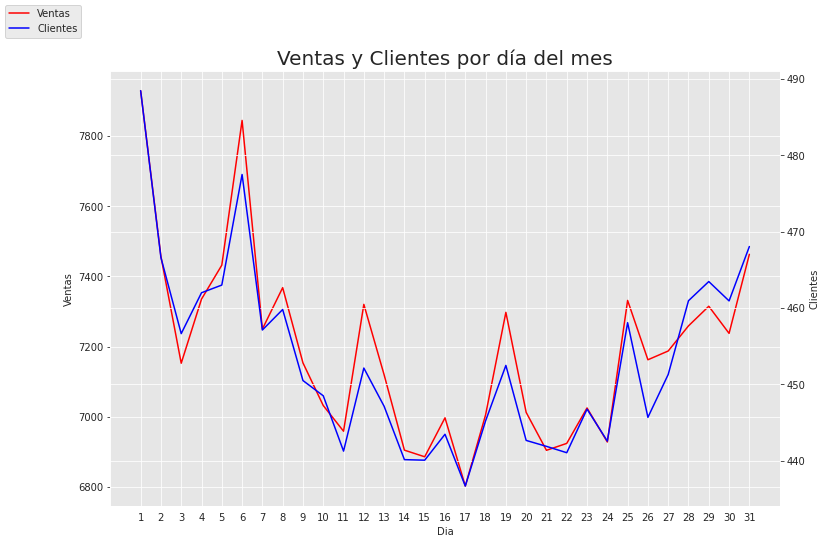

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=df.groupby('Dia')[['Ventas','Clientes']].mean(), x='Dia', y='Ventas', color='r', label='Ventas', legend=False)
ax2 = plt.twinx()
sns.lineplot(data=df.groupby('Dia')[['Ventas','Clientes']].mean(), x='Dia', y='Clientes', ax=ax2, color='b', label='Clientes', legend=False)
ax.figure.legend(loc='upper left', )
plt.xticks(range(1,32))
plt.title('Ventas y Clientes por día del mes', fontsize = 20)
plt.show()

Insight


*   Podemos observar que hay un incremento de clientes y ventas durante la última y la primera semana del mes.
*   Estas semanas suelen coincidir con las fechas de cobro de los salarios por lo que esto puede aumentar al nivel de afluencia de los locales

In [ ]:
df_tipo_local = df.groupby('Tipo_Local')[['Ventas','Clientes']].mean()
df_tipo_local

,Ventas,Clientes
Tipo_Local,,
In Store,7186.744412,452.963939
Mall,7192.238475,453.120110


In [ ]:
df_Comunidad = df.groupby('Comunidad')[['Ventas','Clientes']].mean()
df_Comunidad

,Ventas,Clientes
Comunidad,,
1,7192.545732,453.206940
2,7171.048081,451.964783
3,7211.499695,454.673873
4,7180.111460,451.469388
5,7186.535932,452.706456


# Analizamos las ventas y los clientes por día de la semana

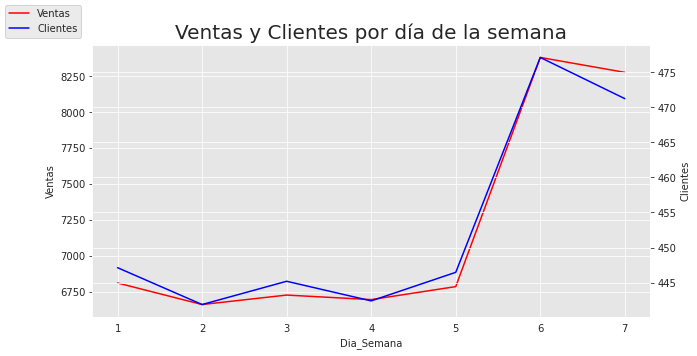

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df.groupby('Dia_Semana')[['Ventas','Clientes']].mean(), x='Dia_Semana', y='Ventas', color='r', label='Ventas', legend=False)
ax2 = plt.twinx()
sns.lineplot(data=df.groupby('Dia_Semana')[['Ventas','Clientes']].mean(), x='Dia_Semana', y='Clientes', ax=ax2, color='b', label='Clientes', legend=False)
ax.figure.legend(loc='upper left', )
plt.title('Ventas y Clientes por día de la semana', fontsize = 20)
plt.show()

Insight


*   Podemos observar que hay un incremento de clientes y ventas durante el fin de semana (de viernes a domingo) siendo el día más fuerte el sábado
*   Estos días coinciden con los días libres laborales

<Figure size 720x360 with 0 Axes>

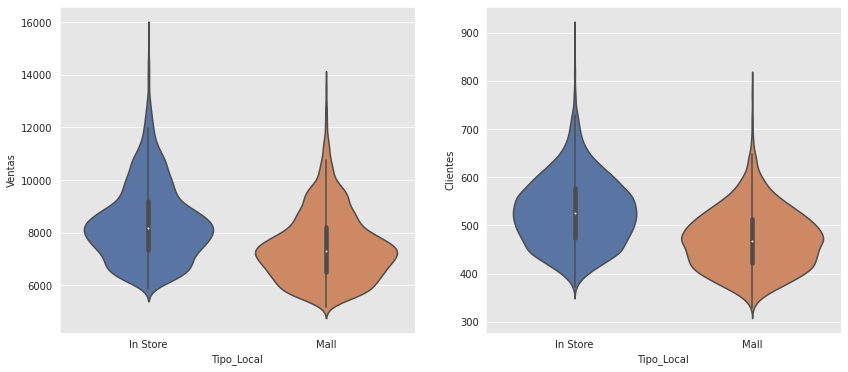

In [56]:
plt.figure(figsize=(10,5))
plt.subplots(1,2)
plt.subplot(121)
sns.violinplot(data=df, x='Tipo_Local', y='Ventas')
plt.subplot(122)
sns.violinplot(data=df, x='Tipo_Local', y='Clientes')
plt.show()

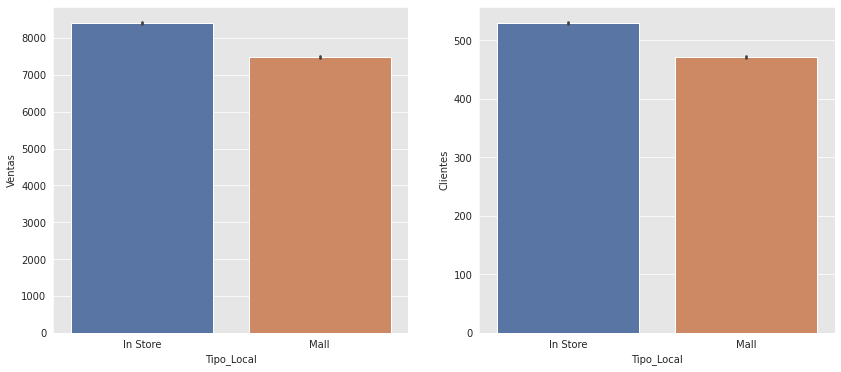

In [55]:
plt.subplots(1,2)
plt.subplot(121)
sns.barplot(data=df, x='Tipo_Local', y='Ventas')
plt.subplot(122)
sns.barplot(data=df, x='Tipo_Local', y='Clientes')
plt.show()

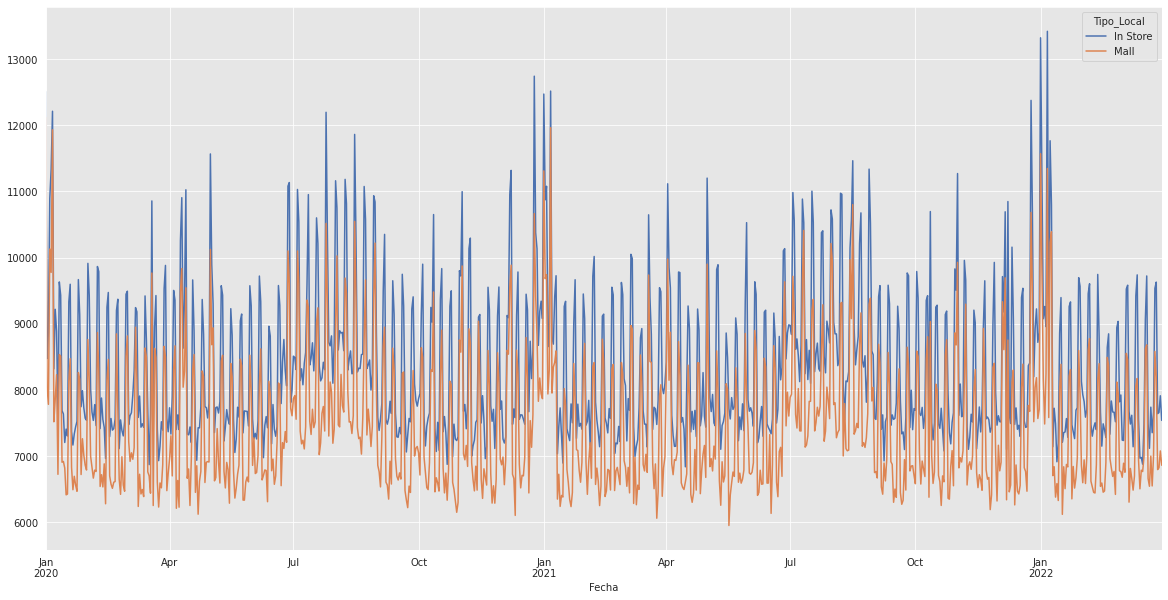

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['Fecha','Tipo_Local']).mean()['Ventas'].unstack().plot(ax=ax)
plt.show()

<Figure size 1680x720 with 0 Axes>

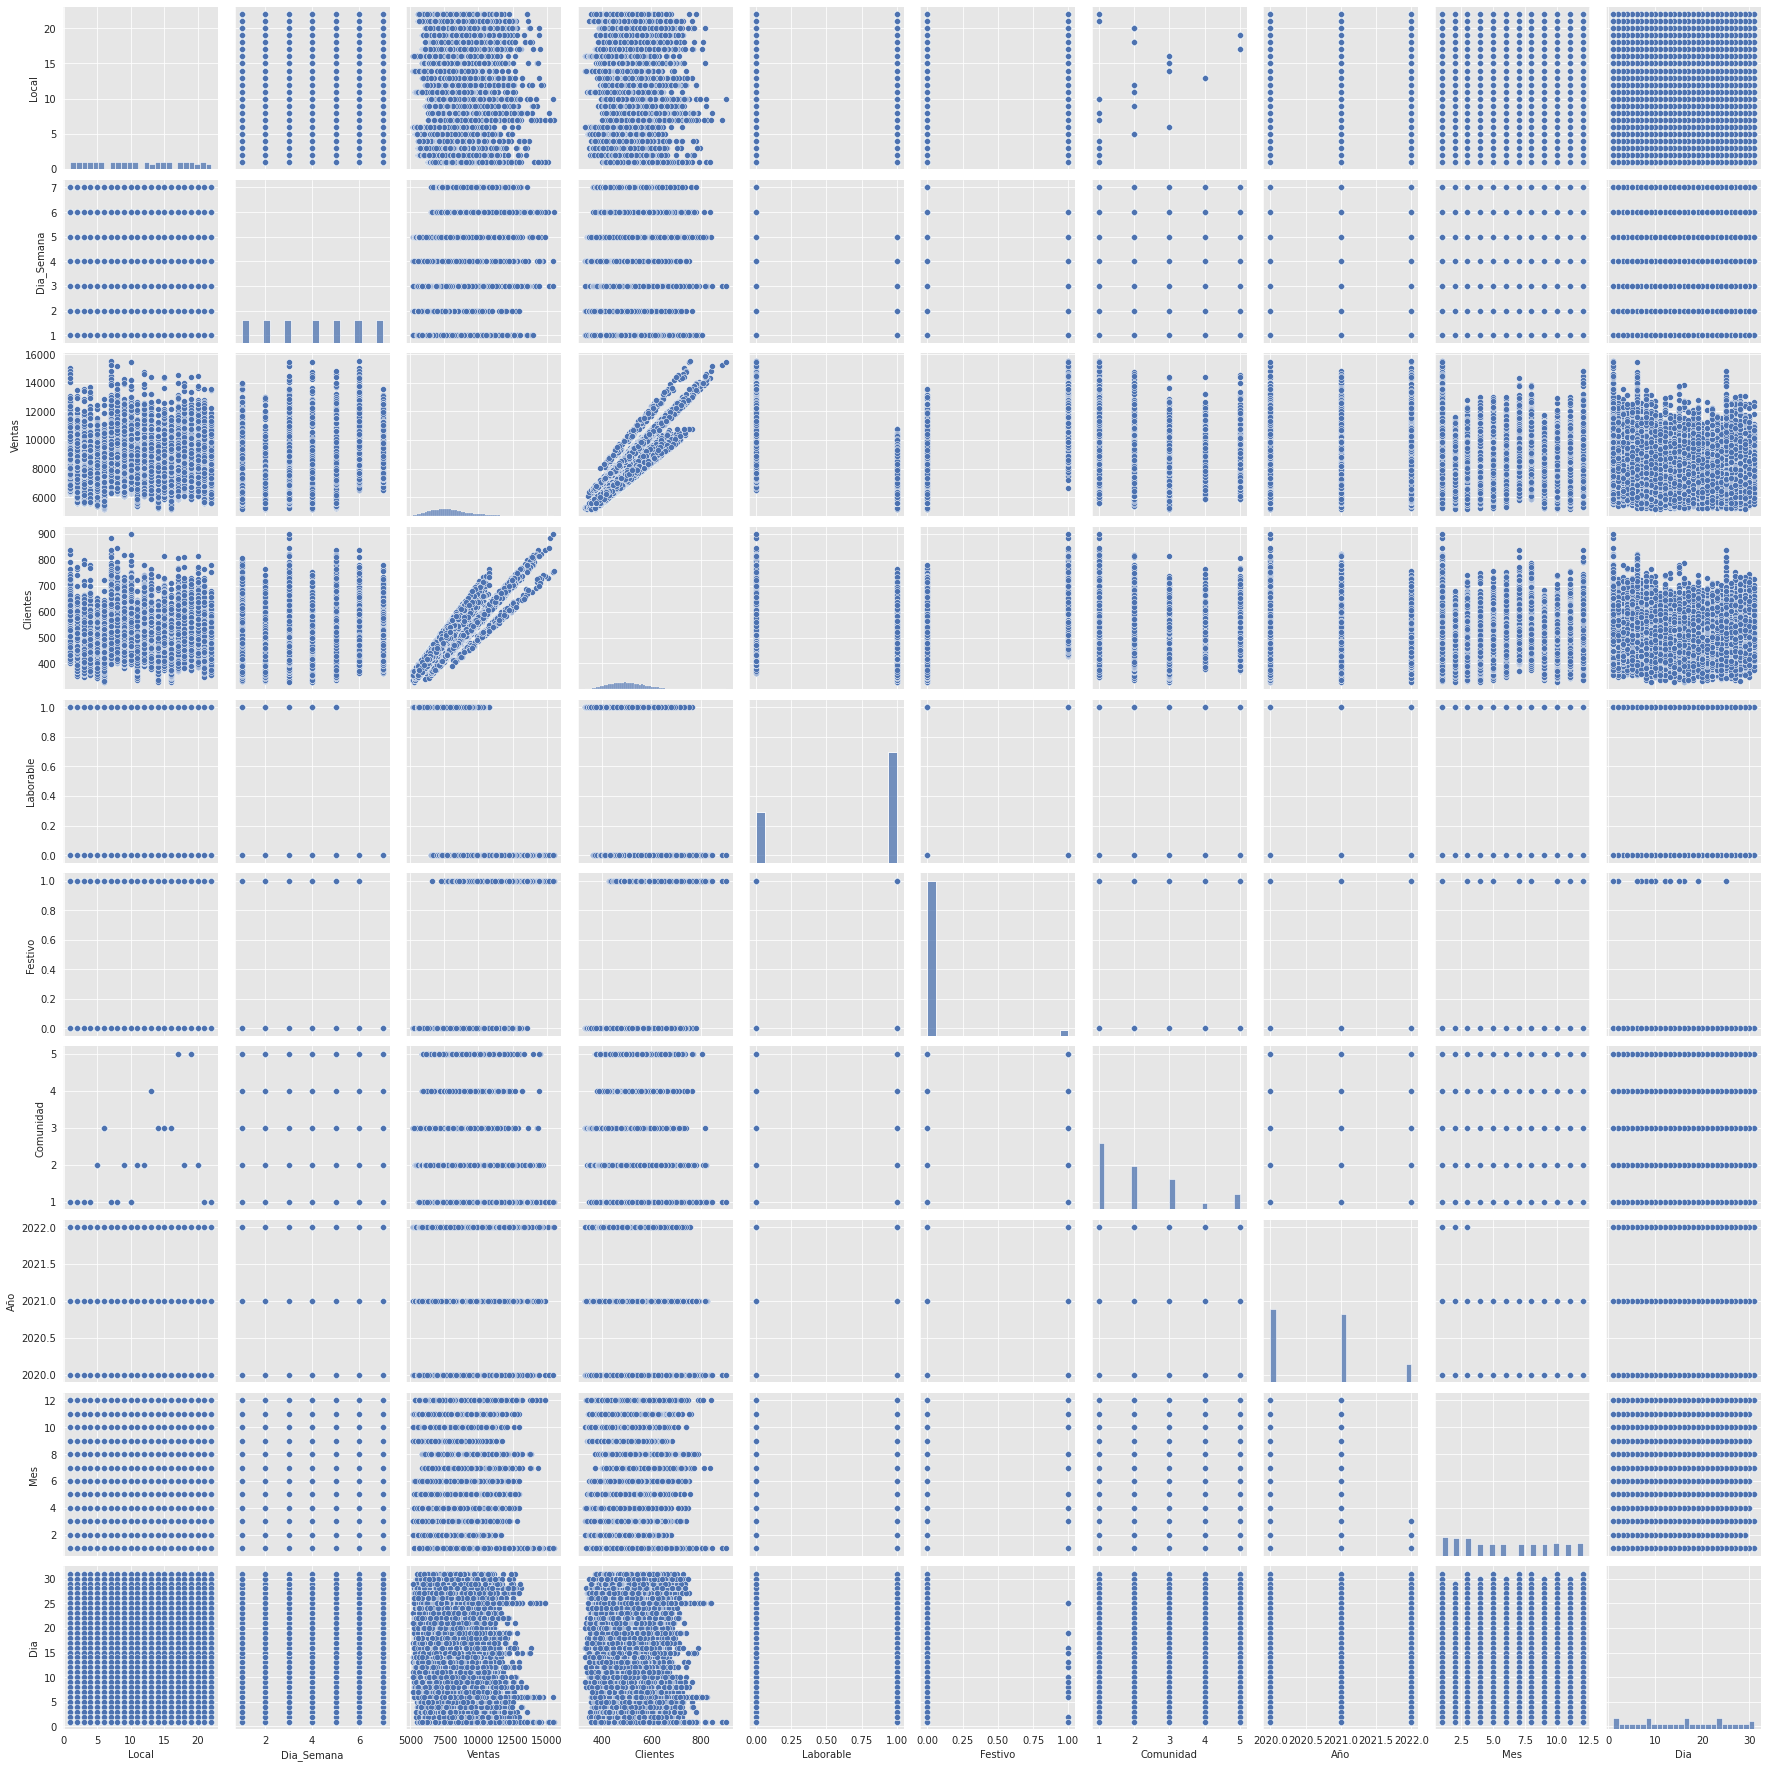

In [58]:
#Creamos un Pairplot del dataset
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

In [59]:
from fbprophet import Prophet
# Visualization tool: leverage plotly for interactive visualization
from fbprophet.plot import plot_plotly, plot_components_plotly   
# Performance evaluation tools
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics

In [73]:
holidays = pd.DataFrame({'ds':df[df.Festivo==1].Fecha, 'holiday':'Festivo'})
holidays

,ds,holiday
84,2022-01-06,Festivo
89,2022-01-01,Festivo
96,2021-12-25,Festivo
113,2021-12-08,Festivo
115,2021-12-06,Festivo
...,...,...
17409,2020-04-10,Festivo
17410,2020-04-09,Festivo
17431,2020-03-19,Festivo
17504,2020-01-06,Festivo


In [61]:
store_df = df[['Fecha', 'Ventas','Laborable']].rename(columns={'Fecha':'ds', 'Ventas':'y'})

In [62]:
store_df

,ds,y,Laborable
0,2022-03-31,8290,1
1,2022-03-30,6958,1
2,2022-03-29,8099,1
3,2022-03-28,8542,1
4,2022-03-27,8917,0
...,...,...,...
17505,2020-01-05,8887,0
17506,2020-01-04,11305,0
17507,2020-01-03,7924,1
17508,2020-01-02,9285,1


In [63]:
store_df.dtypes

ds           datetime64[ns]
y                     int64
Laborable             int64
dtype: object

In [64]:
def forecast_sales(Local, df, periods):
  print(f'Sales forecast for Store n°{Local}')
  store_df = df[df['Local']==Local]
  store_df = store_df[['Fecha', 'Ventas','Laborable']].rename(columns={'Fecha':'ds', 'Ventas':'y'})
  model= Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False, 
        holidays = holidays, 
        interval_width=1, 
        mcmc_samples = 0,
        growth='linear',
        changepoint_prior_scale = 0.1,
        seasonality_prior_scale = 0.1)
  model.fit(store_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(df=future)

  #figure1 = model.plot(forecast, xlabel='date', ylabel='sales')
  #plt.title(f'Sales forecast for Store n°{store_id}')
  
  return model, forecast

In [66]:
model, forecast = forecast_sales(12, df, periods=21)
forecast.tail(21)

Sales forecast for Store n°12


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Festivo,Festivo_lower,Festivo_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
821,2022-04-01,8313.651156,4145.370969,10342.547893,8313.650744,8313.651610,0.0,0.0,0.0,-968.815021,...,-455.802658,-455.802658,-455.802658,-513.012364,-513.012364,-513.012364,0.0,0.0,0.0,7344.836135
822,2022-04-02,8313.800090,6317.770165,11707.239841,8313.799106,8313.801102,0.0,0.0,0.0,818.529261,...,1342.563771,1342.563771,1342.563771,-524.034510,-524.034510,-524.034510,0.0,0.0,0.0,9132.329351
823,2022-04-03,8313.949024,6727.313518,12145.102779,8313.947333,8313.950627,0.0,0.0,0.0,863.284519,...,1394.459598,1394.459598,1394.459598,-531.175078,-531.175078,-531.175078,0.0,0.0,0.0,9177.233543
824,2022-04-04,8314.097958,4614.785981,10105.549329,8314.095552,8314.100152,0.0,0.0,0.0,-1054.023578,...,-519.760875,-519.760875,-519.760875,-534.262703,-534.262703,-534.262703,0.0,0.0,0.0,7260.074380
825,2022-04-05,8314.246892,3949.859214,10282.898267,8314.243564,8314.249678,0.0,0.0,0.0,-1105.357997,...,-572.132557,-572.132557,-572.132557,-533.225439,-533.225439,-533.225439,0.0,0.0,0.0,7208.888895
826,2022-04-06,8314.395826,4222.419306,10171.982999,8314.391576,8314.399203,0.0,0.0,0.0,-1132.896393,...,-604.802822,-604.802822,-604.802822,-528.093572,-528.093572,-528.093572,0.0,0.0,0.0,7181.499432
827,2022-04-07,8314.544760,4234.324120,9595.134849,8314.539420,8314.548728,0.0,0.0,0.0,-1103.523916,...,-584.524457,-584.524457,-584.524457,-518.999459,-518.999459,-518.999459,0.0,0.0,0.0,7211.020844
828,2022-04-08,8314.693694,4608.231917,10063.985593,8314.687141,8314.698350,0.0,0.0,0.0,-961.977084,...,-455.802658,-455.802658,-455.802658,-506.174427,-506.174427,-506.174427,0.0,0.0,0.0,7352.716609
829,2022-04-09,8314.842627,6133.191760,11822.493575,8314.834860,8314.848438,0.0,0.0,0.0,852.620996,...,1342.563771,1342.563771,1342.563771,-489.942775,-489.942775,-489.942775,0.0,0.0,0.0,9167.463624
830,2022-04-10,8314.991561,6746.936591,12724.288606,8314.982535,8314.998527,0.0,0.0,0.0,923.746507,...,1394.459598,1394.459598,1394.459598,-470.713091,-470.713091,-470.713091,0.0,0.0,0.0,9238.738068


In [77]:
forecast.tail(21)[['ds', 'yhat']]

,ds,yhat
821,2022-04-01,7344.836135
822,2022-04-02,9132.329351
823,2022-04-03,9177.233543
824,2022-04-04,7260.074380
825,2022-04-05,7208.888895
826,2022-04-06,7181.499432
827,2022-04-07,7211.020844
828,2022-04-08,7352.716609
829,2022-04-09,9167.463624
830,2022-04-10,9238.738068


In [78]:
plot_plotly(model, forecast)

In [68]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(
    model=model, 
    initial='540 days', 
    period='90 days', 
    horizon = '180 days'
)

df_cv

INFO:fbprophet:Making 2 forecasts with cutoffs between 2021-07-04 00:00:00 and 2021-10-02 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-07-05,8696.915650,4688.216674,11548.624410,9392,2021-07-04
1,2021-07-06,8598.081228,5668.690030,11356.981991,9990,2021-07-04
2,2021-07-07,8593.763544,5307.888841,11411.864339,9357,2021-07-04
3,2021-07-08,8617.667265,5735.158045,11093.021622,9030,2021-07-04
4,2021-07-09,8849.016958,5828.754064,11951.165686,9485,2021-07-04
...,...,...,...,...,...,...
355,2022-03-27,9239.033981,6608.369205,12451.291999,9253,2021-10-02
356,2022-03-28,7327.781826,4261.256987,10349.842248,6464,2021-10-02
357,2022-03-29,7254.962660,4639.809169,9790.439575,6528,2021-10-02
358,2022-03-30,7148.608996,4216.203993,9764.477237,8169,2021-10-02


In [69]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df=df_cv, rolling_window=0.10)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,18 days,6.870550e+05,828.887824,669.726037,0.080075,0.058364,1.000000
1,19 days,6.875874e+05,829.208921,666.142052,0.081069,0.054975,1.000000
2,20 days,6.999398e+05,836.624067,685.874822,0.083993,0.058364,1.000000
3,21 days,8.296082e+05,910.828278,748.947051,0.092047,0.062810,1.000000
4,22 days,7.986374e+05,893.665138,726.238258,0.089335,0.062810,1.000000
...,...,...,...,...,...,...,...
158,176 days,9.127280e+05,955.367976,706.348489,0.088977,0.066849,0.972222
159,177 days,9.371011e+05,968.039826,730.045324,0.091230,0.072496,0.972222
160,178 days,1.008640e+06,1004.310836,762.477077,0.093631,0.085038,0.972222
161,179 days,1.061253e+06,1030.171446,796.024663,0.097430,0.104708,0.972222


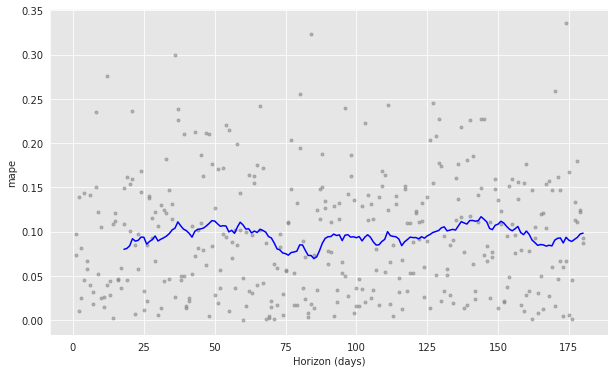

In [70]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

Text(0.5, 1.0, 'Model performance with Cross validation and RMSE')

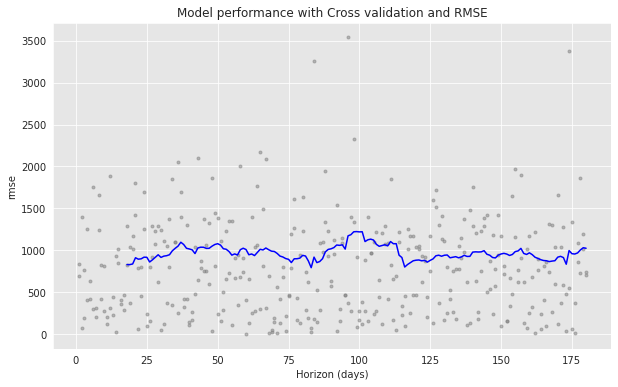

In [71]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.title('Model performance with Cross validation and RMSE')

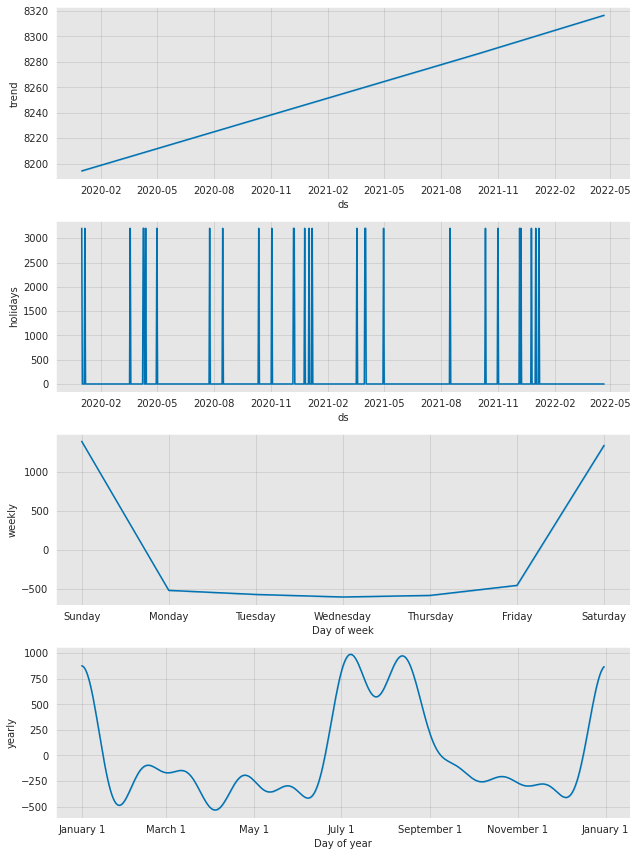

In [72]:
figure2= model.plot_components(forecast)